# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah Telco Customer Churn, yang diperoleh dari platform Kaggle, sebuah repositori publik terpercaya yang banyak digunakan dalam pengembangan dan eksperimen sistem machine learning. Dataset ini dipublikasikan oleh IBM Sample Data dan tersedia secara bebas di alamat berikut:

📎 Sumber Dataset:
Kaggle - Telco Customer Churn

Dataset ini berisi informasi mengenai pelanggan dari sebuah perusahaan telekomunikasi fiktif. Tujuan utama dari dataset ini adalah untuk memprediksi kemungkinan pelanggan berhenti berlangganan (churn) berdasarkan berbagai karakteristik, seperti jenis layanan, durasi berlangganan, dan biaya bulanan.

📊 Deskripsi Dataset
Jumlah baris: 7.043 entri (masing-masing merepresentasikan satu pelanggan)

Jumlah fitur: 21 kolom, terdiri dari:

Fitur numerik: tenure, MonthlyCharges, TotalCharges

Fitur kategorikal: gender, Partner, Dependents, PhoneService, InternetService, dsb.

Target: Churn (dengan nilai Yes atau No)

🎯 Tujuan Penggunaan
Dataset ini sangat relevan untuk proyek MSML karena memenuhi beberapa karakteristik penting:

Dapat digunakan untuk klasifikasi biner (Churn atau Tidak)

Memiliki kombinasi fitur numerik dan kategorikal

Cocok untuk eksperimen preprocessing, pelatihan model, deployment, hingga monitoring dan alerting

Dataset ini akan digunakan dalam seluruh tahapan proyek akhir, mulai dari preprocessing, pelatihan model menggunakan MLflow, CI/CD workflow untuk retraining otomatis, hingga sistem monitoring dengan Prometheus dan Grafana.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

# Definisikan path ke folder tujuan
project_dir = "/content/drive/MyDrive/Project Colab/Dicoding/MembangunSistemMachineLearning/submission"

# Buat folder jika belum ada
os.makedirs(project_dir, exist_ok=True)

# Pindah ke folder tersebut
%cd "$project_dir"

/content/drive/MyDrive/Project Colab/Dicoding/MembangunSistemMachineLearning/submission


In [7]:
from google.colab import files
files.upload()  # Upload file kaggle.json kamu

# Setup Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip
!mv WA_Fn-UseC_-Telco-Customer-Churn.csv dataset_raw/

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 23.9MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
mv: cannot move 'WA_Fn-UseC_-Telco-Customer-Churn.csv' to 'dataset_raw/': Not a directory


In [13]:
!mkdir -p dataset_raw
!mv WA_Fn-UseC_-Telco-Customer-Churn.csv dataset_raw/

In [15]:
df = pd.read_csv('dataset_raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Ukuran dataset:", df.shape)
df.head()

Ukuran dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [16]:
df.info()
print("\nDeskripsi Statistik:\n", df.describe())
print("\nJumlah duplikat:", df.duplicated().sum())
print("\nJumlah missing values:\n", df.isnull().sum())
print("\nDistribusi target:\n", df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


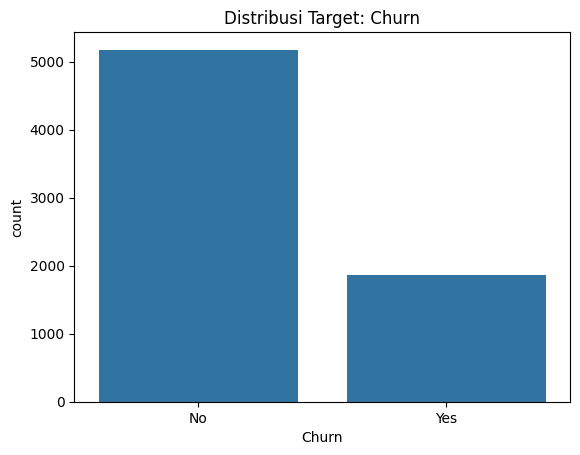

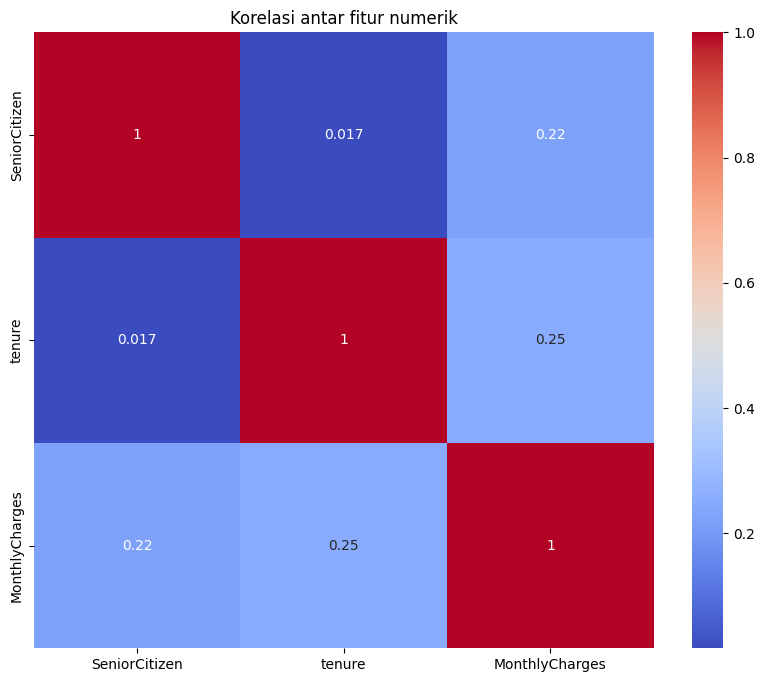

In [17]:
sns.countplot(data=df, x='Churn')
plt.title("Distribusi Target: Churn")

# Korelasi numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# Drop kolom ID
df.drop(columns=['customerID'], inplace=True)

# Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target (Churn: Yes/No → 1/0)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Pisahkan fitur kategorikal
categorical_cols = df.select_dtypes(include='object').columns
print("Fitur kategorikal:", list(categorical_cols))

# One-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Fitur kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Gabungkan kembali untuk disimpan
train_df = X_train.copy()
train_df['target'] = y_train

test_df = X_test.copy()
test_df['target'] = y_test

In [20]:
import os

save_path = '../preprocessing/dataset_preprocessing'
os.makedirs(save_path, exist_ok=True)

train_df.to_csv(f'{save_path}/train.csv', index=False)
test_df.to_csv(f'{save_path}/test.csv', index=False)

print("Data berhasil disimpan ke folder preprocessing/dataset_preprocessing/")

Data berhasil disimpan ke folder preprocessing/dataset_preprocessing/
